In [1]:
# Important Libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline
from zipfile import ZipFile
import sqlite3

#### 1.0 Reading Datasets
 - movie_gross
 - movie_info
 - movie_budgets
 - movies datasets

##### 1.1 Data\bom.movie_gross.csv

In [3]:
# Reading movie_gross dataset
df_movie_gross= pd.read_csv("../data/bom.movie_gross.csv",encoding='latin1',index_col = None)

df_movie_gross.shape # checking the shape of dataframe
"""Has 3387 rows and 5 columns"""

print(df_movie_gross.info())
df_movie_gross.head() # displaying sample data (first 5 rows)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


##### 1.2 Data\tn.movie_budgets.csv

In [4]:
# Reading movie_budgets dataset
df_movie_budgets= pd.read_csv("../data/tn.movie_budgets.csv",encoding='latin1')

df_movie_budgets.shape # checking shape
"""Has 5782 rows and 6 columns"""

df_movie_budgets.info()
df_movie_budgets.head() # displaying sample data (first 5 rows)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


##### 1.3 Data\tmdb.movies.csv

In [5]:
# Reading tmdb_movies dataset
df_movies = pd.read_csv("../data/tmdb.movies.csv",encoding='latin1')
df_movies.shape # checking shape
"""Has 26517 rows and 10 columns"""

df_movies.info()
df_movies.head().T # displaying sample data (first 5 rows)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
genre_ids,"[12, 14, 10751]","[14, 12, 16, 10751]","[12, 28, 878]","[16, 35, 10751]","[28, 878, 12]"
id,12444,10191,10138,862,27205
original_language,en,en,en,en,en
original_title,Harry Potter and the Deathly Hallows: Part 1,How to Train Your Dragon,Iron Man 2,Toy Story,Inception
popularity,33.533,28.734,28.515,28.005,27.92
release_date,2010-11-19,2010-03-26,2010-05-07,1995-11-22,2010-07-16
title,Harry Potter and the Deathly Hallows: Part 1,How to Train Your Dragon,Iron Man 2,Toy Story,Inception
vote_average,7.7,7.7,6.8,7.9,8.3
vote_count,10788,7610,12368,10174,22186


##### 1.4 Data\rt.movie_info.tsv

In [6]:
# Reading tmdb_movies dataset
df_movie_info= pd.read_csv("../data/rt.movie_info.tsv",sep='\t',encoding ='latin1')
df_movie_info.shape # checking shape
"""Has 1560 rows and 12 columns"""

df_movie_info.info()
df_movie_info.head().T # displaying sample data (first 5 rows)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


,0,1,2,3,4
id,1,3,5,6,7
synopsis,"This gritty, fast-paced, and innovative police...","New York City, not-too-distant-future: Eric Pa...",Illeana Douglas delivers a superb performance ...,Michael Douglas runs afoul of a treacherous su...,NaN
rating,R,R,R,R,NR
genre,Action and Adventure|Classics|Drama,Drama|Science Fiction and Fantasy,Drama|Musical and Performing Arts,Drama|Mystery and Suspense,Drama|Romance
director,William Friedkin,David Cronenberg,Allison Anders,Barry Levinson,Rodney Bennett
writer,Ernest Tidyman,David Cronenberg|Don DeLillo,Allison Anders,Paul Attanasio|Michael Crichton,Giles Cooper
theater_date,"Oct 9, 1971","Aug 17, 2012","Sep 13, 1996","Dec 9, 1994",NaN
dvd_date,"Sep 25, 2001","Jan 1, 2013","Apr 18, 2000","Aug 27, 1997",NaN
currency,NaN,$,NaN,NaN,NaN
box_office,NaN,"600,000",NaN,NaN,NaN


##### 1.1.0 Cleaning dataset

##### Cleaning bom.movie_gross & tn.movie_budgets

In [7]:
# Function to remove special columns from movies_gross and movies_budgets
def special_characters( df,columns):
    # for each colums specified the below is perfomed
    for col in columns:
        # Check if the column is of type object (string) before cleaning
        if df[col].dtype == 'object':
           df[col] = df[col].replace({'\$': '', ',': ''}, regex=True).astype(float)
           # Assertion to ensure the column has been converted to float
        assert df[col].dtype == 'float64', f"Column {col} was not converted to float"
    return df

#specifying dataframes
df1 = df_movie_gross
df2 = df_movie_budgets

# specifying columns from the budgets and gross dataframes
columns_to_clean_df1 = ['foreign_gross']
columns_to_clean_df2 = ['production_budget','domestic_gross','worldwide_gross']

# cleaning specificified columns
df1 = special_characters(df1, columns_to_clean_df1)
df2 = special_characters(df2, columns_to_clean_df2)

# output sample
df2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [ ]:
# creating a new columns in df_movies_budget 
#year in the df_movies_budget by extracting years from release_date
df2['year'] = pd.to_datetime(df2['release_date']).dt.year.astype(int)

# checking column creation of year and datatype
assert 'year' in df2.columns, "The 'year' column was not created."
assert df2['year'].dtype == 'int32', "The 'year' column is not type integer."

# Feature engineering a foreign_gross column
# foreign_gross = worldwide_gross - domestic_gross 
df2['foreign_gross'] = df2['worldwide_gross'] - df2 ['domestic_gross']
# assertion
assert 'foreign_gross' in df2.columns,"The 'foreign_gross column was not created"

In [9]:
# creating new columns in movies_gross
# Feature engineering a worldwide_gross column
# worldwide_gross = foreign_gross + domestic-gross
df1['worldwide_gross'] = df1['foreign_gross'] + df1['domestic_gross']
#assertion
assert 'worldwide_gross' in df1.columns

In [10]:
# Lets drop columns not to be used for analysis in both the gross and budget tables
columns_to_drop = ['id','release_date']
df2 = df2.drop(columns = columns_to_drop,errors = 'ignore')
# renaming the movie column to title
df2 = df2.rename(columns = {'movie':'title'},errors='ignore')

In [11]:
# Function to change all titles to title case and removing any leading whitespaces
def clean_df(df):
    # Title case for all columns containing 'title' in the column name
    for col in df.columns:
        if 'title' in col.lower():
            df[col] = df[col].str.title()  # Converts to title case

        # Uppercase for all columns containing 'studio' in the column name
        elif 'studio' in col.lower():
            df[col] = df[col].str.upper()  # Converts to uppercase

        # Remove leading and trailing whitespace from all columns
        df[col] = df[col].str.strip() if df[col].dtype == "object" else df[col]
    
    return df

# ouput:
df1 = clean_df(df1)
df2 = clean_df(df2)

##### Cleaning tmdB.movies

In [12]:
# cleaning tmdb.movies
df_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [13]:
#Assigning df-movies to a new df for cleaning
df3 = df_movies
# Convert both columns to title case
df3['original_title'] = df3['original_title'].str.title()
df3['title'] = df3['title'].str.title()

# Identify rows where titles are not identical after standardization
mismatched_titles = df3[df3['original_title'] != df3['title']]

# View mismatched titles if any
mismatched_titles.count()
"""A total of 2532 mismatched titles"""

'A total of 2532 mismatched titles'

In [14]:
# creating a new columns in df_movies_budget 
#year in the df_movies_budget by extracting years from release_date
df3['year'] = pd.to_datetime(df3['release_date']).dt.year.astype(int)

# checking column creation of year and datatype
assert 'year' in df3.columns, "The 'year' column was not created."
assert df3['year'].dtype == 'int32', "The 'year' column is not type integer."

In [15]:
# Creating a new column genre names 
# changing genre_ids to lists 
df3['genre_ids'] = df3['genre_ids'].apply(lambda x: eval(x) if isinstance(x, str) else x)

genre_mapping = {
    12: 'Adventure', 10759:'Action&Adventure',10764:'Reality',
    14: 'Fantasy',16:'Animation',80:'Crime',10749:'Romance',
    10751: 'Family',99:'Documentary',18:'Drama',878:'Sci-Fi',
    28: 'Action',36:'History',27:'Horror',10762:'Kids',53:'Thriller',
    35: 'Comedy',10402:'Music',9648:'Mystery',10763:'News',37:'Western',
    10765:'Sci-Fi&Fantasy',10766:'Soap',10767:'Talk',10752:'War',10768:'War&Politics'
}

# Function to map genre IDs to names
def map_genre_ids(genre_ids):
    return [genre_mapping.get(genre_id, 'Unknown') for genre_id in genre_ids]

# Apply the function to create a new column with genre names
df3['genre_names'] = df3['genre_ids'].apply(map_genre_ids)

# View the dataframe with the new column
df3.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,year,genre_names
0,0,"[12, 14, 10751]",12444,en,Harry Potter And The Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter And The Deathly Hallows: Part 1,7.7,10788,2010,"[Adventure, Fantasy, Family]"
1,1,"[14, 12, 16, 10751]",10191,en,How To Train Your Dragon,28.734,2010-03-26,How To Train Your Dragon,7.7,7610,2010,"[Fantasy, Adventure, Animation, Family]"
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010,"[Adventure, Action, Sci-Fi]"
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995,"[Animation, Comedy, Family]"
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010,"[Action, Sci-Fi, Adventure]"


In [16]:
df3.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count',
       'year', 'genre_names'],
      dtype='object')

In [17]:
# dropping columns
cols_to_drop = ['Unnamed: 0','original_language','original_title','release_date']
df3 = df3.drop(columns = cols_to_drop,errors='ignore')

In [18]:
# changing the genre columns back to string from list
df3['genre_ids'] = df3['genre_ids'].apply(lambda x: str(x))
df3['genre_names'] = df3['genre_names'].apply(lambda x: str(x))
# checking for duplicates
duplicates = df3[df3.duplicated(subset=['id','title','genre_ids','year'], keep =False)]
"""A total of 2016 duplicates"""
# dropping duplicates
df3_clean = df3.drop_duplicates(subset=['id', 'title', 'genre_ids', 'year'], keep='first')

##### 1.1.0(a) Merging movie gross and movie budget dataset

In [19]:
# Left join `df1` to `df2` based on 'title' and 'year'
merged_df = df2.merge(df1, on=['title', 'year'], how='left', suffixes=('_df2', '_df1'))

# Filter non-matching rows in `df1` (rows that aren't in `df2`)
# We'll keep only the rows in `df1` that don't match `df2` and have no nulls
not_matching_df1 = df1[~df1[['title', 'year']].isin(df2[['title', 'year']]).all(axis=1)]
not_matching_df1 = not_matching_df1.dropna()

# Concatenate `merged_df` with filtered not-matching rows from `df1`
final_df = pd.concat([merged_df, not_matching_df1], ignore_index=True)

# Drop any duplicate rows based on 'title' and 'year' (if necessary)
final_df = final_df.drop_duplicates(subset=['title', 'year'], keep='first')

# Clean up column suffixes if needed (e.g., prioritize df2 columns over df1)
final_df['domestic_gross'] = final_df['domestic_gross_df2'].combine_first(final_df['domestic_gross_df1'])
final_df['foreign_gross'] = final_df['foreign_gross_df2'].combine_first(final_df['foreign_gross_df1'])
final_df['worldwide_gross'] = final_df['worldwide_gross_df2'].combine_first(final_df['worldwide_gross_df1'])

# Drop intermediate columns with suffixes
final_df = final_df.drop(columns=['domestic_gross_df2', 'foreign_gross_df2', 'worldwide_gross_df2',
                                  'domestic_gross_df1', 'foreign_gross_df1', 'worldwide_gross_df1'])

# View the final DataFrame
final_df.head()


,title,production_budget,year,studio,domestic_gross,foreign_gross,worldwide_gross
0,Avatar,425000000.0,2009,NaN,760507625.0,2.015838e+09,2.776345e+09
1,Pirates Of The Caribbean: On Stranger Tides,410600000.0,2011,BV,241063875.0,8.046000e+08,1.045664e+09
2,Dark Phoenix,350000000.0,2019,NaN,42762350.0,1.070000e+08,1.497624e+08
3,Avengers: Age Of Ultron,330600000.0,2015,BV,459005868.0,9.440081e+08,1.403014e+09
4,Star Wars Ep. Viii: The Last Jedi,317000000.0,2017,NaN,620181382.0,6.965404e+08,1.316722e+09


In [20]:
# Replacing null studio names with unknown
final_df['studio']= final_df['studio'].fillna('UNKNOWN')

# Dropping null values
final_df = final_df.dropna()

final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5781 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              5781 non-null   object 
 1   production_budget  5781 non-null   float64
 2   year               5781 non-null   int64  
 3   studio             5781 non-null   object 
 4   domestic_gross     5781 non-null   float64
 5   foreign_gross      5781 non-null   float64
 6   worldwide_gross    5781 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 361.3+ KB


##### 1.1.0 (b) Cleaned dataframes

In [21]:
#final_df # contains the movies financial
#df3_clean # contains the movies genres, popopularity, ratings etc

#### EDA on final_df and df3_clean datasets

##### Univariate Analysis

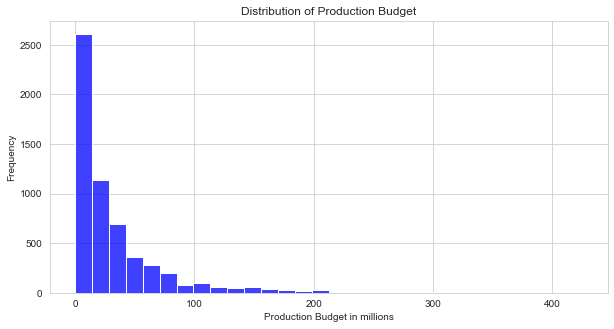

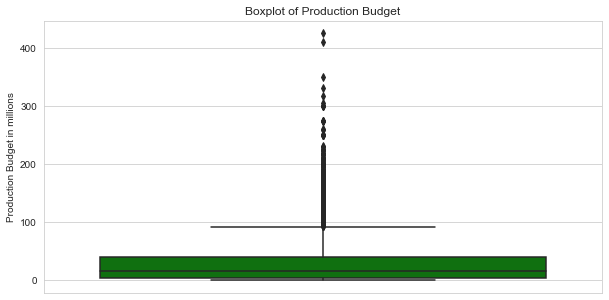

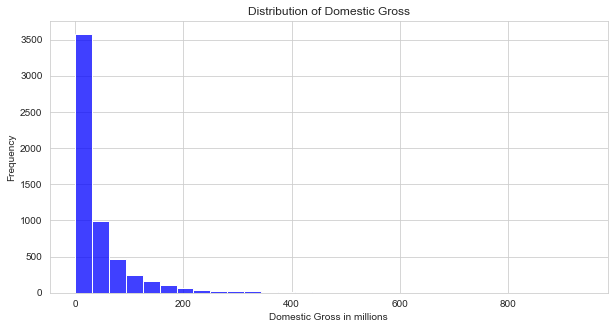

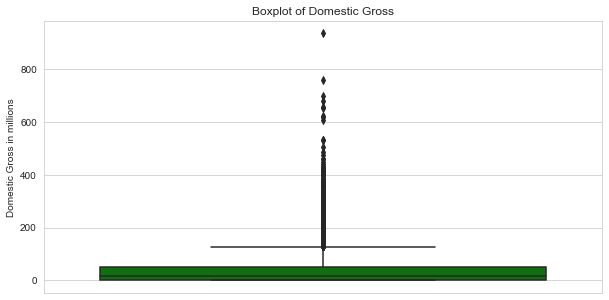

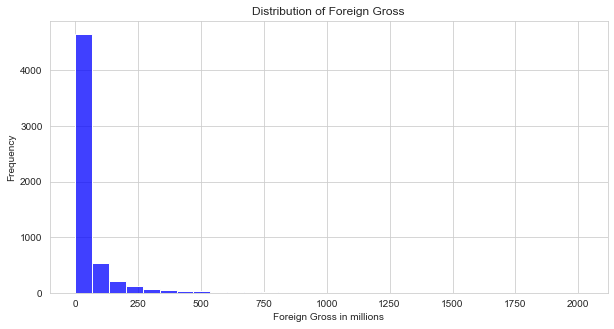

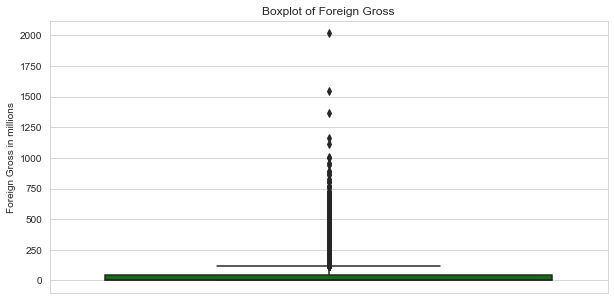

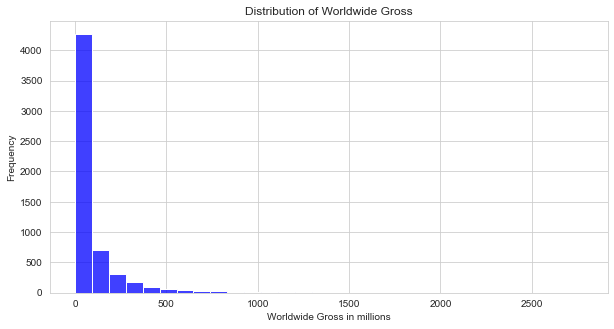

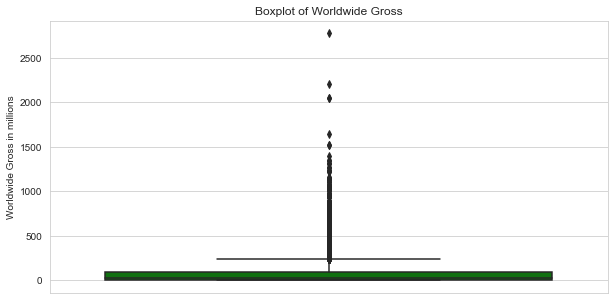

In [ ]:
# Function to plot distribution and boxplot for any given column in the dataset
def plot_column_distribution(df, column_name, bin_size=30, figsize=(10, 5)):
    # Creating a copy of dataframe is copied and we add 'millions' version for readability
    df = df.copy()
    df.loc[:,f'{column_name}_millions'] = df[column_name] / 1000000  # Convert to millions for readability
    
    # Plotting the histogram
    plt.figure(figsize=figsize)
    sns.histplot(df[f'{column_name}_millions'], bins=bin_size, kde=False, color='blue')
    plt.title(f'Distribution of {column_name.replace("_", " ").title()}')
    plt.xlabel(f'{column_name.replace("_", " ").title()} in millions')
    plt.ylabel('Frequency')
    plt.show()

    # Plotting the boxplot for outliers
    plt.figure(figsize=figsize)
    sns.boxplot(y=df[f'{column_name}_millions'], color='green')
    plt.title(f'Boxplot of {column_name.replace("_", " ").title()}')
    plt.ylabel(f'{column_name.replace("_", " ").title()} in millions')
    plt.show()

# usage of the function with final_df for multiple columns:
columns_to_plot = ['production_budget', 'domestic_gross','foreign_gross' ,'worldwide_gross']

# Loop through the columns and plot each one
for column in columns_to_plot:
    plot_column_distribution(final_df, column, bin_size=30, figsize=(10, 5))

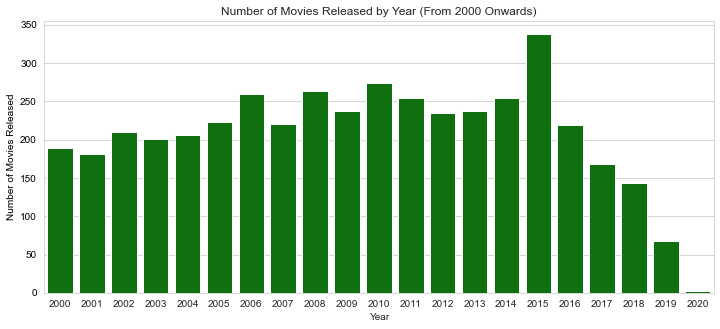

In [66]:
# Filtering years to have only moves produced within a 20 year span
final_df_filtered = final_df[final_df['year'] >= 2000]
movies_count_per_yr = final_df_filtered.groupby('year')['title'].count()

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot a bar chart to show distribution across years
sns.barplot(x=movies_count_per_yr.index, y=movies_count_per_yr.values, color='green', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Movies Released', color='black')
ax1.tick_params(axis='y', labelcolor='black')
plt.title('Number of Movies Released by Year (From 2000 Onwards)')
plt.tight_layout
plt.show()

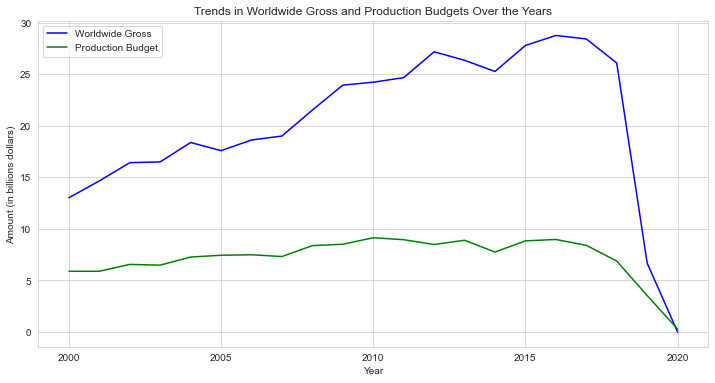

In [52]:
# Group by year to calculate the mean or total worldwide gross and production budget per year
financial_trends = final_df_filtered.groupby('year')[['worldwide_gross', 'production_budget']].sum()

# Reset index for easier plotting
financial_trends = financial_trends.reset_index()

# Recalculating the data to appear in millions
financial_trends['worldwide_gross'] = financial_trends['worldwide_gross'] / 1000000000
financial_trends['production_budget'] = financial_trends['production_budget'] / 1000000000

# Set plot style
plt.figure(figsize=(12, 6))

# Plotting worldwide gross trend
sns.lineplot(x='year', y='worldwide_gross', data=financial_trends, color='blue', label='Worldwide Gross')

# Plotting production budget trend
sns.lineplot(x='year', y='production_budget', data=financial_trends, color='green', label='Production Budget')

# Formatting x-axis to show years as integers
plt.gca().xaxis.get_major_locator().set_params(integer=True)

# Adding titles and labels
plt.title('Trends in Worldwide Gross and Production Budgets Over the Years')
plt.xlabel('Year')
plt.ylabel('Amount (in billions dollars)')
plt.legend()
plt.show()


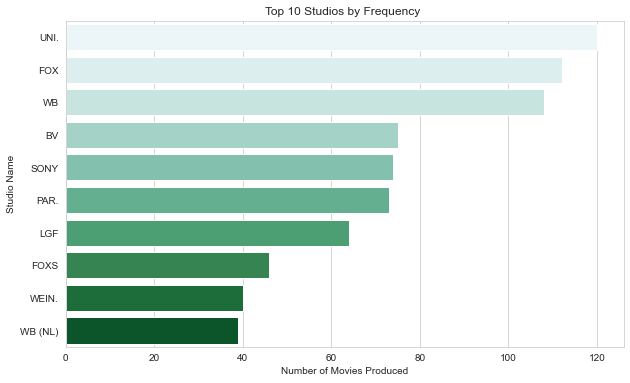

In [62]:
# Plotting top 10 most frequent studios
filtered_studios = final_df[final_df['studio'] != 'UNKNOWN']

plt.figure(figsize=(10, 6))
top_studios = filtered_studios['studio'].value_counts().head(10)
sns.barplot(x=top_studios.values, y=top_studios.index, palette='BuGn')

plt.title("Top 10 Studios by Frequency ")
plt.xlabel("Number of Movies Produced")
plt.ylabel("Studio Name")
plt.show()


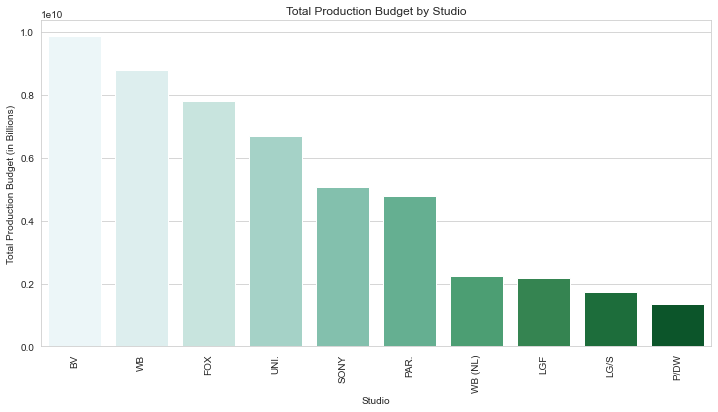

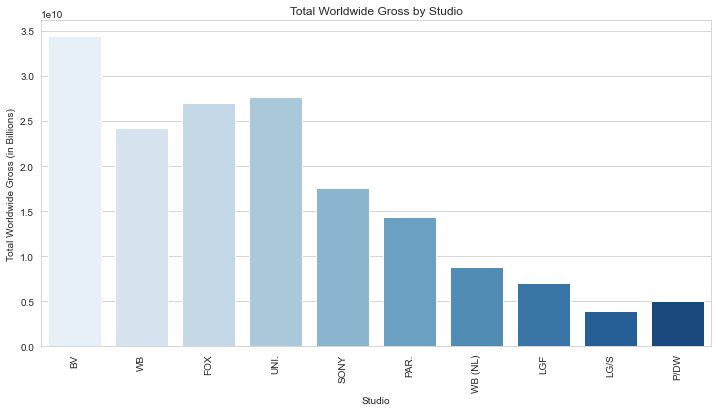

In [74]:
# Grouping by 'studio' to get total production budgets and worldwide gross for each studio
studio_budget_gross = filtered_studios.groupby('studio')[['production_budget', 'worldwide_gross']].sum()

# Sorting values for better visualization
studio_budget_gross = studio_budget_gross.sort_values(by='production_budget', ascending=False).head(10)

# Plotting the total production budget for top 10 studio
plt.figure(figsize=(12, 6))
sns.barplot(x=studio_budget_gross.index, y=studio_budget_gross['production_budget'], palette='BuGn')
plt.title('Total Production Budget by Studio')
plt.xlabel('Studio')
plt.ylabel('Total Production Budget (in Billions)')
plt.xticks(rotation=90)
plt.show()

# Plotting the total worldwide gross for top 10 studio
plt.figure(figsize=(12, 6))
sns.barplot(x=studio_budget_gross.index, y=studio_budget_gross['worldwide_gross'], palette='Blues')
plt.title('Total Worldwide Gross by Studio')
plt.xlabel('Studio')
plt.ylabel('Total Worldwide Gross (in Billions)')
plt.xticks(rotation=90)
plt.show()


#### Observations histograms and box plots
Production Budget Insights
- What is the distribution of production budgets across movies?
  Histogram shows production budget is left skewed, meaning INSERT movies have moderate
   production budgets.
- Box plot also shows cases of outliers in terms of budget as the mean production budget 
   is 31,593,000
   - Min production budget :1100
   - Max production: 425,000,000 (425 millions)
   - Average production budget : 31,593,000(316 millions)

Domestic Gross Insights
- What is the distribution of domestic gross earnings across movies?
Domestic gross is also left skewed, meaning INSERT earnings from movies, but what is the return on investments?
   - Min domestic gross earnings :0
   - Max domestic gross earnings: 936,662,200 (936.7 millions)
   - Average domestic gross earnings :41,880,570 (41.88 millions)